# Problem Statement

### 1. Build the predictive model which can do the prediction of the loan status.

### 2. Run a sales or a marketing campaign where we want to target the good customers.

In [1]:
# Necessery imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
cr = pd.read_csv('CreditRisk.csv') # Reading the dataset and visualizing top five entries
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
cr.describe(include = 'all') # Description of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,981,957,978,956.000000,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,981,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002433,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,775,631,NaN,763,807,NaN,NaN,NaN,NaN,NaN,349,712
mean,NaN,NaN,NaN,0.881799,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,1.255623,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,2.000000,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [4]:
cr.isnull().sum() # Checking for null values

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Filling up the nulls

cr.Gender = cr.Gender.fillna("Male")
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Married = cr.Married.fillna("No")
cr.Dependents = cr.Dependents.fillna(0)
cr.Credit_History = cr.Credit_History.fillna(0)

In [6]:
# cr.isnull().sum()
cr1 = cr.drop(['Loan_ID'],axis = 1) # Drop the nominal column 'Loan_ID'

In [7]:
cr1.head(3) # Shows that LOan_ID column is dropped

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y


In [8]:
# Using Label Encoder to transform object datatypes

le = LabelEncoder()
cr1[cr1.select_dtypes(include=['object']).columns] = cr1[cr1.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [9]:
# Here Loan_status is the target variable comprising of 'Yes' and 'No' options converted to 1 and 0 using LabelEncoder
# So, we divide dataset into X and Y 
cr1_x = cr1.drop('Loan_Status', axis = 1)
cr1_y = cr1.iloc[:,1]

In [10]:
# Checking for multicolinearity among X variables using Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif_values'] = [variance_inflation_factor(cr1_x.values, i) for i in range(cr1_x.shape[1])]
vif['variables'] = cr1_x.columns
vif

,vif_values,variables
0,5.657448,Gender
1,3.486309,Married
2,1.703465,Dependents
3,1.331420,Education
4,1.231365,Self_Employed
5,2.860998,ApplicantIncome
6,1.502496,CoapplicantIncome
7,7.219422,LoanAmount
8,9.651181,Loan_Amount_Term
9,4.008792,Credit_History


#### From the above vif table, it seems that all variables having vif < 10, so we can say that there is less multicolinearity.

In [11]:
# Splitting of the dataset into train and test
cr1_train, cr1_test = train_test_split(cr1, test_size = 0.2, random_state = 0)

## Problem Statement 1: Building the predictive model

In [12]:
# Before buliding the model lets checck for any Class Imbalance

cr1_train.Loan_Status.value_counts(1) * 100

1    71.938776
0    28.061224
Name: Loan_Status, dtype: float64

#### From the above it is clear that there is almost 72%  for class 1  and only 28% for class 0 is present in training data. Hence class 0 gets the lesser representation than class 1

### Resolving Class Imbalance problem:-

In [13]:
a = cr1_train[cr1_train.Loan_Status == 0]
cr_train = pd.concat([cr1_train,a,a])  # Up-sampling classs 0 by using duplicates

In [14]:
cr_train.Loan_Status.value_counts(1) * 100

0    53.921569
1    46.078431
Name: Loan_Status, dtype: float64

#### Now, from the above it can be said that class imbalance problem is almost resolved. 

In [15]:
x_train = cr_train.drop('Loan_Status', axis = 1)
y_train = cr_train.iloc[:,-1]

x_test = cr1_test.drop('Loan_Status', axis = 1)
y_test = cr1_test.iloc[:,-1]

## Logistic Regression model

In [16]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

C:\Users\SOUVIK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
# Prediction on test data
predicted_y_value = logit.predict(x_test)

In [18]:
df_y = pd.DataFrame({'Actual_y':list(y_test), 'Predicted_y':predicted_y_value})
df_y

,Actual_y,Predicted_y
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
5,1,0
6,1,1
7,1,1
8,1,1
9,0,0


In [19]:
# Lets build the confusion matrix

from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(y_test, predicted_y_value)
tab1

array([[ 30,  19],
       [ 22, 126]], dtype=int64)

In [20]:
# Accuracy on test data

accuracy = tab1.diagonal().sum() * 100 / tab1.sum()
accuracy

79.18781725888324

In [21]:
Beta_values = pd.DataFrame({'X-Variables':list(x_train.columns), 'Beta-values':list(logit.coef_.flatten())})
Beta_values

,X-Variables,Beta-values
0,Gender,-0.123981
1,Married,0.496790
2,Dependents,0.079830
3,Education,-0.441019
4,Self_Employed,0.011979
5,ApplicantIncome,0.000003
6,CoapplicantIncome,-0.000025
7,LoanAmount,-0.002329
8,Loan_Amount_Term,-0.002408
9,Credit_History,2.452386


Here in the above x-variables like: ApplicantIncome, CoapplicantIncome have beta values closer to zero(0).   

So, these have very lower importances. Lets build model again  by dropping them from X_variable set

In [22]:
X_train = x_train.drop(['ApplicantIncome','CoapplicantIncome'], axis = 1)
X_test = x_test.drop(['ApplicantIncome','CoapplicantIncome'], axis = 1)

In [23]:
logit.fit(X_train, y_train)

C:\Users\SOUVIK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predicted_y_value = logit.predict(X_test)

In [25]:
tab2 = confusion_matrix(y_test, predicted_y_value)
tab2

array([[ 30,  19],
       [ 22, 126]], dtype=int64)

In [26]:
accuracy = tab2.diagonal().sum() * 100 / tab2.sum()
accuracy

79.18781725888324

From the above observation, it is clear that after dropping the columns: ApplicantIncome, CoapplicantIncome, the accuracy 
is unchanged.

### Lets check Roc_Auc_Score (after resolving class Imbalance Problem)

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_value = roc_auc_score(y_test, predicted_y_value)
roc_auc_value

0.7317981246552675

### Lets Check the f1_score (without solving class Imbalance problem)

In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predicted_y_value)
f1

0.8600682593856656

## Also lets build Logistic Regression without resolving the Class Imbalance problem

In [29]:
x_train = cr1_train.drop('Loan_Status', axis = 1)
y_train = cr1_train.iloc[:,-1]

x_test = cr1_test.drop('Loan_Status', axis = 1)
y_test = cr1_test.iloc[:,-1]

In [31]:
logit1 = LogisticRegression()
logit1.fit(x_train,y_train)

C:\Users\SOUVIK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predict_y = logit1.predict(x_test)

In [33]:
tab_new = confusion_matrix(y_test, predict_y)
tab_new

array([[ 27,  22],
       [ 14, 134]], dtype=int64)

In [34]:
accuracy = tab_new.diagonal().sum() * 100 / tab_new.sum() # Accuracy using Logistic Regression
accuracy

81.7258883248731

### Lets Check the Roc_Auc_score (without solving class Imbalance problem)

In [35]:
roc_auc_value = roc_auc_score(y_test, predict_y)
roc_auc_value

0.7282129067843353

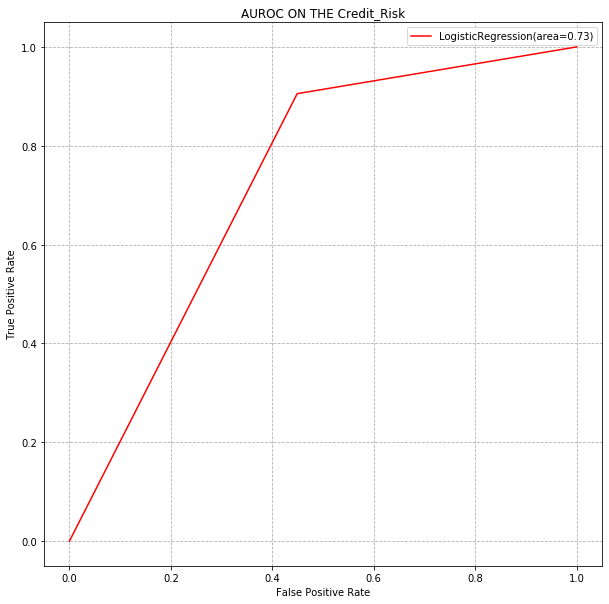

In [36]:
# AUROC curve

from sklearn.metrics import roc_curve

pred_value_prob = pd.DataFrame(logit1.predict_proba(x_test))
pred_value_prob = pred_value_prob.iloc[:,1] # only selecting the +ve (1/yes) column probabilities.

fpr, tpr, threshold = roc_curve(y_test, predict_y)

plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, color = 'r', label="LogisticRegression(area=%.2f)" %roc_auc_value)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC ON THE Credit_Risk')
plt.legend(loc=1)
plt.grid(linestyle = '--')

### Lets Check the f1_score (without solving class Imbalance problem)

In [37]:
f1 = f1_score(y_test, predict_y)
f1

0.881578947368421

##### So, it seems that f1_score (without resolving Class Imbalance) > f1_score (after resolving Class Imbalance). So lets proceed without 

##### resolving the Imbalance problem. 

## Decision Tree model

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
predict_y_dtree = dtree.predict(x_test)

In [40]:
tab3 = confusion_matrix(y_test, predict_y_dtree)
tab3

array([[ 29,  20],
       [ 33, 115]], dtype=int64)

In [41]:
# Accuracy using Decision Tree

accuracy = tab3.diagonal().sum() * 100 / tab3.sum()
accuracy

73.09644670050761

In [42]:
# Roc_Auc_score using Decision Tree

roc_auc_value = roc_auc_score(y_test, predict_y_dtree)
roc_auc_value

0.6844318808604523

In [43]:
# f1_score using Decision Tree

f1 = f1_score(y_test, predict_y_dtree)
f1

0.8127208480565371

##  Random Forest model

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\SOUVIK\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
predict_y_rf = rf.predict(x_test)

In [46]:
tab4 = confusion_matrix(y_test, predict_y_rf)
tab4

array([[ 28,  21],
       [ 22, 126]], dtype=int64)

In [47]:
# Accuracy using Random Forest

accuracy = tab4.diagonal().sum() * 100 / tab4.sum()
accuracy

78.1725888324873

In [48]:
# Roc_Auc_score using Random Forest

roc_auc_value = roc_auc_score(y_test, predict_y_rf)
roc_auc_value

0.7113899613899612

In [49]:
# f1_score using Random Forest

f1 = f1_score(y_test, predict_y_rf)
f1

0.8542372881355931

## Conclusion :- 
    So, after comparing all the models we see that "Logistic Regression model" results in highest accuracy, roc_auc_score and f1_score. Hence, this model fits the dataset better among all the three models and we continue to solve Problem 
    Statement:2 with this model.

## Problem Statement 2: Sales Marketing Campaign for targetting good customers

In [52]:
pred_value_prob = pd.DataFrame(logit1.predict_proba(cr1_x))
pred_value_prob['Loan_ID'] = cr.Loan_ID
pred_value_prob.rename(columns = {pred_value_prob.index[0]:'Rejection',pred_value_prob.index[1]:'Approval'}, inplace = True)

In [53]:
pred_value_prob.sort_values('Approval',ascending = False, inplace=True)
# Sorting in descending order of probability of Approval

In [55]:
pred_value_prob  

,Rejection,Approval,Loan_ID
936,0.043030,0.956970,LP002790
14,0.045791,0.954209,LP001030
575,0.046840,0.953160,LP002868
461,0.052287,0.947713,LP002484
667,0.053147,0.946853,LP001298
686,0.053673,0.946327,LP001375
495,0.057205,0.942795,LP002586
282,0.058415,0.941585,LP001915
68,0.058955,0.941045,LP001238
164,0.059768,0.940232,LP001572


##### Sorted final list along with Loan_IDs attached to probabilities of Approval and Rejection.

##### Through this dataset, Financial sector can easily target good customers, starting from from the top.